
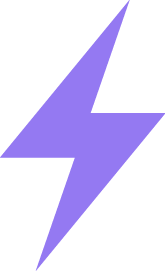

Running local mode, some functionality limited.



In [1]:
####Geopy instructions are located at https://pypi.python.org/pypi/geopy ####
####DBSCAN instructions are located at 
import numpy as np
import pandas as pd
import geopy
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
from pylab import *
from numpy import random
import pdb
from geopy.distance import lonlat, distance, geodesic
import os
import tarfile
pd.options.display.max_columns = 100
##### First Install Lightning using the "pip install lightning-python" Command on the C:\> Command line #######
from lightning import Lightning
lgn = Lightning(ipython=True, local=True)

In [2]:
df = pd.read_csv('distances1.csv')
concise = df.sort_values('power', ascending = False)[['Country Code','Country Code_x','city','city_x','pop','pop_x','combined_pop','distance','power','lat','lng','lat_x','lng_x']]
#concise.sort_values(by='combined_pop', ascending = False)
#concise = concise.reset_index()
concise['citya'] = ((concise['city'] +concise['Country Code'] +';*'+ concise['city_x'] + concise['Country Code_x']))
concise['cityb'] = [sorted(x.split(';*')) for x in concise['citya']]
concise['country'] = [sorted(x.split(';*')) for x in((concise['Country Code'] +';*'+concise['Country Code_x']))]
concise['city1'] = [x[0] for x in concise['cityb']]
concise['city2'] = [x[1] for x in concise['cityb']]
concise['identifier'] = (concise['city1'].map(str) + concise['city2'].map(str))
concise = concise.drop_duplicates(subset='identifier').drop(['identifier','citya','city1','city2'], 1).reset_index()
concise

index Country Code Country Code_x         city        city_x  \
0       55772          EGY            EGY        Cairo       El Giza   
1      111541          PHL            PHL  Quezon City        Manila   
2       82090          IND            IND        Haora       Kolkata   
3       92051          JPN            JPN     Kawasaki         Tokyo   
4       48512          COD            COG     Kinshasa   Brazzaville   
5      120328          SDN            SDN     Omdurman      Khartoum   
6       77524          IND            IND    Ghaziabad         Delhi   
7       63799          IDN            IDN      Jakarta        Bekasi   
8       92053          JPN            JPN     Yokohama         Tokyo   
9       71448          IND            IND        Delhi     Faridabad   
10      81708          IND            IND       Kalyan        Mumbai   
11     128378          USA            USA  Los Angeles    Long Beach   
12      95120          KOR            KOR        Seoul       Incheon   
13      62195          CHN            HKG     Shenzhen     Hong Kong   
14      96638          KOR            KOR        Suwon         Seoul   
15      91671          JPN            JPN         Kobe         Osaka   
16       8798          BRA            BRA    Sao Paulo        Santos   
17      99325          MEX            MEX  Mexico City        Toluca   
18      38925          CHN            CHN     Xianyang          Xian   
19      38580          CHN            CHN    Guangzhou      Dongguan   
20      77526          IND            IND       Meerut         Delhi   
21      91675          JPN            JPN        Kyoto         Osaka   
22      27931          CHN            CHN     Shanghai        Suzhou   
23     127616          USA            USA  Los Angeles        Irvine   
24      84798          IRN            IRN        Karaj        Tehran   
25      88242          JPN            JPN     Yokohama      Kawasaki   
26       9941          BRA            BRA    Sao Paulo      Campinas   
27      78317          IND            IND       Mumbai          Pune   
28      41206          CHN            CHN       Fushun      Shenyeng   
29     101230          MEX            MEX  Mexico City        Puebla   
...       ...          ...            ...          ...           ...   
72361   30502          BRA            CHN       Santos        Ankang   
72362   23644          BRA            CHN       Santos     Changzhou   
72363   65136          VEN            IDN      Maracay  Ujungpandang   
72364   30118          BOL            CHN       La Paz     Zhanjiang   
72365   34293          ARG            CHN      Rosario       Huainan   
72366    8626          KOR            BRA        Suwon       Vitória   
72367    8443          CHN            BRA       Zhuhai       Vitória   
72368   24387          ARG            CHN      Rosario      Xianyang   
72369    9007          KOR            BRA        Suwon        Santos   
72370   24025          BRA            CHN       Santos        Zhuhai   
72371    8625          KOR            BRA     Changwon       Vitória   
72372   24022          BOL            CHN       La Paz        Zhuhai   
72373   32769          ARG            CHN      Rosario         Linyi   
72374    9006          KOR            BRA     Changwon        Santos   
72375    1594          CHN            ARG    Zaozhuang       Rosario   
72376    8425          CHN            BRA     Maanshan       Vitória   
72377    1767          KOR            ARG     Changwon       Rosario   
72378    1768          KOR            ARG        Suwon       Rosario   
72379    1585          CHN            ARG       Zhuhai       Rosario   
72380    1591          CHN            ARG      Nanyang       Rosario   
72381    1590          CHN            ARG     Neijiang       Rosario   
72382    8806          CHN            BRA     Maanshan        Santos   
72383    1584          CHN            ARG    Changzhou       Rosario   
72384   94128          BRA            KOR      V

In [3]:
concise.shape

(72391, 16)

In [4]:
lrt = concise[concise['distance'] < 100]
hsr = concise[concise['distance'] < 1000][concise['distance'] > 100]
flight = concise[concise['distance'] > 1000]

/home/matthew/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [5]:
flight

index Country Code Country Code_x       city        city_x  \
248     96633          JPN            KOR      Tokyo         Seoul   
306     92067          KOR            JPN      Daegu         Tokyo   
316     81736          IND            IND      Delhi        Mumbai   
333     92064          KOR            JPN   Changwon         Tokyo   
340     45457          CHN            CHN   Shanghai       Beijing   
362     77629          PAK            IND    Karachi         Delhi   
374     92069          KOR            JPN    Daejeon         Tokyo   
384     80222          IND            IND     Mumbai       Chennai   
390     45959          JPN            CHN      Tokyo      Shanghai   
396     95109          JPN            KOR      Tokyo       Incheon   
419     92070          KOR            JPN    Gwangju         Tokyo   
424     93966          JPN            KOR      Tokyo         Suwon   
452    113016          JPN            PRK      Tokyo     Pyongyang   
527    109633          PAK            PAK    Karachi        Lahore   
550     45819          CHN            CHN  Guangzhou      Shanghai   
563     62222          CHN            HKG   Shanghai     Hong Kong   
572    138667          USA            USA   New York       Chicago   
574     79460          IND            IND     Mumbai        Kanpur   
575     29195          JPN            CHN      Tokyo         Jilin   
578     91928          CHN            JPN   Shenyeng         Tokyo   
583     69935          IND            IND     Mumbai          Agra   
593     77556          IND            IND    Kolkata         Delhi   
597     45820          CHN            CHN   Dongguan      Shanghai   
599     43673          JPN            CHN      Tokyo     Changchun   
602     91936          CHN            JPN     Harbin         Tokyo   
619     45822          CHN            CHN    Taiyuan      Shanghai   
621     72602          IND            IND     Mumbai         Kochi   
622    125496          EGY            TUR      Cairo      Istanbul   
623    109560          IND            PAK     Mumbai        Lahore   
625     45827          CHN            CHN   Shenyeng      Shanghai   
...       ...          ...            ...        ...           ...   
72361   30502          BRA            CHN     Santos        Ankang   
72362   23644          BRA            CHN     Santos     Changzhou   
72363   65136          VEN            IDN    Maracay  Ujungpandang   
72364   30118          BOL            CHN     La Paz     Zhanjiang   
72365   34293          ARG            CHN    Rosario       Huainan   
72366    8626          KOR            BRA      Suwon       Vitória   
72367    8443          CHN            BRA     Zhuhai       Vitória   
72368   24387          ARG            CHN    Rosario      Xianyang   
72369    9007          KOR            BRA      Suwon        Santos   
72370   24025          BRA            CHN     Santos        Zhuhai   
72371    8625          KOR            BRA   Changwon       Vitória   
72372   24022          BOL            CHN     La Paz        Zhuhai   
72373   32769          ARG            CHN    Rosario         Linyi   
72374    9006          KOR            BRA   Changwon        Santos   
72375    1594          CHN            ARG  Zaozhuang       Rosario   
72376    8425          CHN            BRA   Maanshan       Vitória   
72377    1767          KOR            ARG   Changwon       Rosario   
72378    1768          KOR            ARG      Suwon       Rosario   
72379    1585          CHN            ARG     Zhuhai       Rosario   
72380    1591          CHN            ARG    Nanyang       Rosario   
72381    1590          CHN            ARG   Neijiang       Rosario   
72382    8806          CHN            BRA   Maanshan        Santos   
72383    1584          CHN            ARG  Changzhou       Rosario   
72384   94128          BRA            KOR    Vitória         Ulsan   
72385   63612          VEN            IDN    Maracay       Cilacap   
72386    1570     

In [6]:
hsr

index Country Code Country Code_x           city        city_x  \
27      78317          IND            IND         Mumbai          Pune   
29     101230          MEX            MEX    Mexico City        Puebla   
32      28693          CHN            CHN       Shanghai          Wuxi   
34      42027          CHN            CHN        Beijing       Tianjin   
35     136000          USA            USA       New York  Philadelphia   
36      68792          IND            IND         Mumbai         Nasik   
39     125674          TUR            TUR          Bursa      Istanbul   
42      45807          CHN            CHN         Ningbo      Shanghai   
44      43171          CHN            CHN       Shanghai      Hangzhou   
45      45781          CHN            CHN      Changzhou      Shanghai   
48      35531          CHN            CHN      Guangzhou      Shenzhen   
51      89774          JPN            JPN          Tokyo        Nagoya   
53      62202          CHN            HKG      Guangzhou     Hong Kong   
54      65704          IDN            IDN        Jakarta       Bandung   
56     108871          PAK            PAK        Karachi     Hyderabad   
58       6110          BGD            BGD         Khulna         Dhaka   
60       5928          IND            BGD        Kolkata        Khulna   
62      80984          IND            IND         Mumbai         Surat   
63      96642          KOR            KOR        Daejeon         Seoul   
65      81930          BGD            IND          Dhaka       Kolkata   
66      56534          EGY            EGY     Alexandria         Cairo   
67      90536          JPN            JPN          Tokyo        Sendai   
69     109626          PAK            PAK     Faisalabad        Lahore   
72      18405          CHN            CHN        Beijing       Baoding   
73      69924          IND            IND          Delhi          Agra   
74      92060          JPN            JPN          Osaka         Tokyo   
75      21444          CHN            CHN        Tianjin      Tangshan   
77      21453          CHN            CHN        Beijing      Tangshan   
79      89773          JPN            JPN          Osaka        Nagoya   
81      42790          CHN            CHN       Shanghai       Nanjing   
...       ...          ...            ...            ...           ...   
9001     2965          RUS            ARM         Rostov       Yerevan   
9005    33988          CHN            CHN         Ankang        Hohhot   
9018    58813          DNK            GBR      København    Manchester   
9035    94194          CHN            KOR         Ningbo         Ulsan   
9060    69139          IND            IND     Aurangabad     Allahabad   
9076    33009          KOR            CHN       Changwon         Linyi   
9082    83310          KWT            IRN         Kuwait        Tabriz   
9189    72578          IND            IND     Vijayawada         Kochi   
9197    77140          IND            IND     Aurangabad    Coimbatore   
9263    75614          IND            IND       Warangal       Asansol   
9288    23319          CHN            CHN         Ankang       Ganzhou   
9292    76758          IND            IND       Sholapur       Madurai   
9299    60142          TUR            GEO          Adana       Tbilisi   
9304    74856          IND            IND      Allahabad      Amritsar   
9411    67636          IND            IND        Madurai      Warangal   
9414    68379          IND            IND      Ghaziabad    Aurangabad   
9431    50887          IRL            DEU         Dublin         Essen   
9454    75235          IND            IND     Aurangabad      Varanasi   
9487    26278          VNM            CHN       Haiphong      Neijiang   
9619    30527          CHN            CHN        Baoding        Ankang   
9638   118339          JOR            SAU          Amman        Medina   
9883    30524          CHN            CHN       Maanshan        Ankang   
9991    9416

In [7]:
concise['same'] = np.where(concise['Country Code'] == concise['Country Code_x'], 'yes', 'no')
usa = pd.concat([concise[concise['Country Code'] == 'USA'], concise[concise['Country Code_x'] == 'USA'][concise['same'] == 'no']])
usa = usa[usa['same'] == 'yes']

/home/matthew/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [8]:
usa.head()

index Country Code Country Code_x         city           city_x  \
11  128378          USA            USA  Los Angeles       Long Beach   
23  127616          USA            USA  Los Angeles           Irvine   
35  136000          USA            USA     New York     Philadelphia   
46  127994          USA            USA        Miami  Fort Lauderdale   
57  128349          USA            USA       Irvine       Long Beach   

           pop      pop_x  combined_pop    distance          power        lat  \
11   8097410.0  1249195.5     9346605.5   22.609290  413396.680286  33.989978   
23   8097410.0  1611303.5     9708713.5   47.209887  205650.005115  33.989978   
35  13524139.0  3504775.0    17028914.0  130.951058  130040.293709  40.749979   
46   2983947.0  1103781.5     4087728.5   39.474861  103552.700976  25.787611   
57   1611303.5  1249195.5     2860499.0   32.621461   87687.641414  33.680411   

           lng      lat_x       lng_x                            cityb  \
11 -118.179980  33.786967 -118.158044  [Long BeachUSA, Los AngelesUSA]   
23 -118.179980  33.680411 -117.829950      [IrvineUSA, Los AngelesUSA]   
35  -73.980017  39.999973  -75.169996   [New YorkUSA, PhiladelphiaUSA]   
46  -80.224106  26.136065  -80.141786   [Fort LauderdaleUSA, MiamiUSA]   
57 -117.829950  33.786967 -118.158044       [IrvineUSA, Long BeachUSA]   

       country same  
11  [USA, USA]  yes  
23  [USA, USA]  yes  
35  [USA, USA]  yes  
46  [USA, USA]  yes  
57  [USA, USA]  yes

In [9]:
usa.shape

(528, 17)

In [10]:
usa.tail()

index Country Code Country Code_x        city           city_x  \
35390  135596          USA            USA  Sacramento            Tampa   
35556  130638          USA            USA    Columbus       Sacramento   
37413  127974          USA            USA    San Jose  Fort Lauderdale   
40128  127977          USA            USA    Portland  Fort Lauderdale   
40705  127975          USA            USA  Sacramento  Fort Lauderdale   

             pop      pop_x  combined_pop     distance       power        lat  \
35390  1035949.0  1319232.5     2355181.5  3789.071639  621.572175  38.575021   
35556  1003418.0  1035949.0     2039367.0  3298.122110  618.341872  39.979974   
37413  1281471.5  1103781.5     2385253.0  4105.522157  580.986512  37.299983   
40128  1207756.5  1103781.5     2311538.0  4335.313118  533.188247  45.520024   
40705  1035949.0  1103781.5     2139730.5  4087.681351  523.458244  38.575021   

              lng      lat_x       lng_x                                cityb  \
35390 -121.470038  27.946988  -82.458621            [SacramentoUSA, TampaUSA]   
35556  -82.990010  38.575021 -121.470038         [ColumbusUSA, SacramentoUSA]   
37413 -121.849989  26.136065  -80.141786    [Fort LauderdaleUSA, San JoseUSA]   
40128 -122.679990  26.136065  -80.141786    [Fort LauderdaleUSA, PortlandUSA]   
40705 -121.470038  26.136065  -80.141786  [Fort LauderdaleUSA, SacramentoUSA]   

          country same  
35390  [USA, USA]  yes  
35556  [USA, USA]  yes  
37413  [USA, USA]  yes  
40128  [USA, USA]  yes  
40705  [USA, USA]  yes

In [38]:
def scatter(fd):
    x = fd['lat'].append(fd['lat_x'])
    y = fd['lng'].append(fd['lng_x'])
    return lgn.scatter(y,x, labels = fd['city'].append(fd['city_x']))
def countryall(country):
    return pd.concat([concise[concise['Country Code'] == str(country)], concise[concise['Country Code_x'] == str(country)][concise['same'] == 'no']])
def domestic(country):
    return concise[concise['Country Code'] == str(country)][concise['same'] == 'yes']
def domesticlength(country,number1, number2):
    return concise[concise['Country Code'] == str(country)][concise['same'] == 'yes'][concise['distance'] < number2][concise['distance'] > number1]
def cityselector(city):
    return pd.concat([concise[concise['city'] == str(city)], concise[concise['city_x'] == str(city)]]).sort_values(by='power', ascending = False)
def citylength(city, number1, number2):
    return pd.concat([concise[concise['city'] == str(city)], concise[concise['city_x'] == str(city)]])[concise['distance'] < number2][concise['distance'] > number1].sort_values(by='power', ascending = False)

In [12]:
scatter(concise)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [13]:
x = concise['lat']
y = concise['lng']
lgn.scatter(y, x, labels = concise['city'])

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [14]:
canada = pd.concat([concise[concise['Country Code'] == 'CAN'], concise[concise['Country Code_x'] == 'CAN'][concise['same'] == 'no']])
#canada = usa[usa['same'] == 'yes']

/home/matthew/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [15]:
canada[canada['same'] == 'yes']

index Country Code Country Code_x      city     city_x        pop  \
689    14898          CAN            CAN   Toronto   Montréal  4573710.5   
5464   15277          CAN            CAN   Calgary  Vancouver  1012661.0   
10979  15658          CAN            CAN   Calgary    Toronto  1012661.0   
12724  15279          CAN            CAN   Toronto  Vancouver  4573710.5   
17304  14896          CAN            CAN   Calgary   Montréal  1012661.0   
19019  15278          CAN            CAN  Montréal  Vancouver  3017278.0   

           pop_x  combined_pop     distance         power        lat  \
689    3017278.0     7590988.5   504.566110  15044.586530  43.699980   
5464   1458415.0     2471076.0   675.973140   3655.583117  51.082992   
10979  4573710.5     5586371.5  2713.685852   2058.591821  51.082992   
12724  1458415.0     6032125.5  3363.437898   1793.440427  43.699980   
17304  3017278.0     4029939.0  3028.104996   1330.845200  51.082992   
19019  1458415.0     4475693.0  3696.239104   1210.877563  45.499999   

              lng      lat_x       lng_x                        cityb  \
689    -79.420021  45.499999  -73.583297    [MontréalCAN, TorontoCAN]   
5464  -114.079998  49.273417 -123.121644   [CalgaryCAN, VancouverCAN]   
10979 -114.079998  43.699980  -79.420021     [CalgaryCAN, TorontoCAN]   
12724  -79.420021  49.273417 -123.121644   [TorontoCAN, VancouverCAN]   
17304 -114.079998  45.499999  -73.583297    [CalgaryCAN, MontréalCAN]   
19019  -73.583297  49.273417 -123.121644  [MontréalCAN, VancouverCAN]   

          country same  
689    [CAN, CAN]  yes  
5464   [CAN, CAN]  yes  
10979  [CAN, CAN]  yes  
12724  [CAN, CAN]  yes  
17304  [CAN, CAN]  yes  
19019  [CAN, CAN]  yes

In [16]:
usa

index Country Code Country Code_x              city            city_x  \
11     128378          USA            USA       Los Angeles        Long Beach   
23     127616          USA            USA       Los Angeles            Irvine   
35     136000          USA            USA          New York      Philadelphia   
46     127994          USA            USA             Miami   Fort Lauderdale   
57     128349          USA            USA            Irvine        Long Beach   
59     134830          USA            USA         Ft. Worth            Dallas   
78     129903          USA            USA  Washington, D.C.         Baltimore   
90     134093          USA            USA       Los Angeles         San Diego   
105    139785          USA            USA         Baltimore          New York   
106    135238          USA            USA          New York            Boston   
119    139429          USA            USA          New York  Washington, D.C.   
128    130277          USA            USA     San Francisco          San Jose   
182    135975          USA            USA         Baltimore      Philadelphia   
203    127603          USA            USA         San Diego            Irvine   
218    139420          USA            USA      Philadelphia  Washington, D.C.   
220    132571          USA            USA          New York        Pittsburgh   
262    129520          USA            USA           Chicago      Indianapolis   
283    131045          USA            USA       Los Angeles         Las Vegas   
295    132181          USA            USA           Detroit         Cleveland   
298    136739          USA            USA        Sacramento     San Francisco   
336    128365          USA            USA         San Diego        Long Beach   
342    132190          USA            USA          New York         Cleveland   
361    136378          USA            USA           Chicago           Detroit   
397    136381          USA            USA          New York           Detroit   
444    137512          USA            USA            Dallas           Houston   
464    139024          USA            USA          San Jose       Los Angeles   
465    139782          USA            USA          Columbus          New York   
484    139033          USA            USA           Phoenix       Los Angeles   
510    136760          USA            USA       Los Angeles     San Francisco   
533    137504          USA            USA       San Antonio           Houston   
...       ...          ...            ...               ...               ...   
29384  130259          USA            USA      Indianapolis          San Jose   
29448  136732          USA            USA   Fort Lauderdale     San Francisco   
29655  129501          USA            USA          Portland      Indianapolis   
29669  131022          USA            USA         Baltimore         Las Vegas   
29798  128738          USA            USA         Las Vegas          Columbus   
30341  128369          USA            USA             Tampa        Long Beach   
30732  128360          USA            USA         Cleveland        Long Beach   
30777  127968          USA            USA            Irvine   Fort Lauderdale   
30970  130647          USA            USA        Pittsburgh        Sacramento   
31296  131408          USA            USA         Cleveland          Portland   
31322  128354          USA            USA         Baltimore        Long Beach   
31690  132166          USA            USA          San Jose         Cleveland   
31755  128351          USA            USA          Columbus        Long Beach   
31800  130640          USA            USA      Indianapolis        Sacramento   
32193  131403          USA            USA         Baltimore          Portland   
32283  130260          USA            USA         Baltimore          San Jose   
32695  135595          USA            USA          San Jose             Tampa   
32881  128736          USA            U

In [23]:
domestic('AUS')

/home/matthew/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


index Country Code Country Code_x       city     city_x        pop  \
1557    4200          AUS            AUS  Melbourne     Sydney  2131812.5   
1968    3057          AUS            AUS     Sydney   Brisbane  4135711.0   
8450    3056          AUS            AUS  Melbourne   Brisbane  2131812.5   
14148   4199          AUS            AUS      Perth     Sydney  1206108.0   
18793   3818          AUS            AUS      Perth  Melbourne  1206108.0   
31284   3436          AUS            AUS   Brisbane      Perth  1393176.5   

           pop_x  combined_pop     distance        power        lat  \
1557   4135711.0     6267523.5   708.089911  8851.310268 -37.820031   
1968   1393176.5     5528887.5   738.282377  7488.852059 -33.920011   
8450   1393176.5     3524989.0  1374.597732  2564.378595 -37.820031   
14148  4135711.0     5341819.0  3296.389929  1620.505801 -31.955015   
18793  2131812.5     3337920.5  2729.574840  1222.871947 -31.955015   
31284  1206108.0     2599284.5  3616.092048   718.810380 -27.455031   

              lng      lat_x       lng_x                        cityb  \
1557   144.975016 -33.920011  151.185180    [MelbourneAUS, SydneyAUS]   
1968   151.185180 -27.455031  153.035093     [BrisbaneAUS, SydneyAUS]   
8450   144.975016 -27.455031  153.035093  [BrisbaneAUS, MelbourneAUS]   
14148  115.839999 -33.920011  151.185180        [PerthAUS, SydneyAUS]   
18793  115.839999 -37.820031  144.975016     [MelbourneAUS, PerthAUS]   
31284  153.035093 -31.955015  115.839999      [BrisbaneAUS, PerthAUS]   

          country same  
1557   [AUS, AUS]  yes  
1968   [AUS, AUS]  yes  
8450   [AUS, AUS]  yes  
14148  [AUS, AUS]  yes  
18793  [AUS, AUS]  yes  
31284  [AUS, AUS]  yes

In [25]:
hsr.reset_index()

level_0   index Country Code Country Code_x           city  \
0          27   78317          IND            IND         Mumbai   
1          29  101230          MEX            MEX    Mexico City   
2          32   28693          CHN            CHN       Shanghai   
3          34   42027          CHN            CHN        Beijing   
4          35  136000          USA            USA       New York   
5          36   68792          IND            IND         Mumbai   
6          39  125674          TUR            TUR          Bursa   
7          42   45807          CHN            CHN         Ningbo   
8          44   43171          CHN            CHN       Shanghai   
9          45   45781          CHN            CHN      Changzhou   
10         48   35531          CHN            CHN      Guangzhou   
11         51   89774          JPN            JPN          Tokyo   
12         53   62202          CHN            HKG      Guangzhou   
13         54   65704          IDN            IDN        Jakarta   
14         56  108871          PAK            PAK        Karachi   
15         58    6110          BGD            BGD         Khulna   
16         60    5928          IND            BGD        Kolkata   
17         62   80984          IND            IND         Mumbai   
18         63   96642          KOR            KOR        Daejeon   
19         65   81930          BGD            IND          Dhaka   
20         66   56534          EGY            EGY     Alexandria   
21         67   90536          JPN            JPN          Tokyo   
22         69  109626          PAK            PAK     Faisalabad   
23         72   18405          CHN            CHN        Beijing   
24         73   69924          IND            IND          Delhi   
25         74   92060          JPN            JPN          Osaka   
26         75   21444          CHN            CHN        Tianjin   
27         77   21453          CHN            CHN        Beijing   
28         79   89773          JPN            JPN          Osaka   
29         81   42790          CHN            CHN       Shanghai   
...       ...     ...          ...            ...            ...   
3150     9001    2965          RUS            ARM         Rostov   
3151     9005   33988          CHN            CHN         Ankang   
3152     9018   58813          DNK            GBR      København   
3153     9035   94194          CHN            KOR         Ningbo   
3154     9060   69139          IND            IND     Aurangabad   
3155     9076   33009          KOR            CHN       Changwon   
3156     9082   83310          KWT            IRN         Kuwait   
3157     9189   72578          IND            IND     Vijayawada   
3158     9197   77140          IND            IND     Aurangabad   
3159     9263   75614          IND            IND       Warangal   
3160     9288   23319          CHN            CHN         Ankang   
3161     9292   76758          IND            IND       Sholapur   
3162     9299   60142          TUR            GEO          Adana   
3163     9304   74856          IND            IND      Allahabad   
3164     9411   67636          IND            IND        Madurai   
3165     9414   68379          IND            IND      Ghaziabad   
3166     9431   50887          IRL            DEU         Dublin   
3167     9454   75235          IND            IND     Aurangabad   
3168     9487   26278          VNM            CHN       Haiphong   
3169     9619   30527          CHN            CHN        Baoding   
3170     9638  118339          JOR            SAU          Amman   
3171     9883   30524          CHN            CHN       Maanshan   
3172     9991   94168          CHN            KOR      Changzhou   
3173    10059   17207          CHN            CHN       Xianyang   
3174    10118  140349          DOM            VEN  Santo Domingo   
3175    10200   67625          IND            IND          Kochi   
3176    10226   94192          CHN            KOR          Lin

In [28]:
domesticlength('USA', 100, 1000).reset_index()

/home/matthew/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


level_0   index Country Code Country Code_x              city  \
0         35  136000          USA            USA          New York   
1         90  134093          USA            USA       Los Angeles   
2        105  139785          USA            USA         Baltimore   
3        106  135238          USA            USA          New York   
4        119  139429          USA            USA          New York   
5        182  135975          USA            USA         Baltimore   
6        203  127603          USA            USA         San Diego   
7        218  139420          USA            USA      Philadelphia   
8        220  132571          USA            USA          New York   
9        262  129520          USA            USA           Chicago   
10       283  131045          USA            USA       Los Angeles   
11       295  132181          USA            USA           Detroit   
12       298  136739          USA            USA        Sacramento   
13       336  128365          USA            USA         San Diego   
14       342  132190          USA            USA          New York   
15       361  136378          USA            USA           Chicago   
16       397  136381          USA            USA          New York   
17       444  137512          USA            USA            Dallas   
18       464  139024          USA            USA          San Jose   
19       465  139782          USA            USA          Columbus   
20       484  139033          USA            USA           Phoenix   
21       510  136760          USA            USA       Los Angeles   
22       533  137504          USA            USA       San Antonio   
23       544  138654          USA            USA         St. Louis   
24       626  130261          USA            USA        Sacramento   
25       653  139025          USA            USA        Sacramento   
26       665  128758          USA            USA           Chicago   
27       716  132552          USA            USA         Cleveland   
28       767  135989          USA            USA            Boston   
29       769  132187          USA            USA           Chicago   
..       ...     ...          ...            ...               ...   
85      3610  134071          USA            USA          San Jose   
86      3630  135974          USA            USA      Indianapolis   
87      3671  131039          USA            USA     San Francisco   
88      3685  134463          USA            USA            Dallas   
89      3718  138268          USA            USA        Pittsburgh   
90      3871  137128          USA            USA           Phoenix   
91      3943  136364          USA            USA       Minneapolis   
92      4127  129522          USA            USA  Washington, D.C.   
93      4188  128735          USA            USA         Baltimore   
94      4447  129900          USA            USA           Atlanta   
95      4514  130635          USA            USA            Irvine   
96      4515  135219          USA            USA         Cleveland   
97      4581  132186          USA            USA           Atlanta   
98      4744  130262          USA            USA         Las Vegas   
99      4827  134072          USA            USA        Sacramento   
100     5123  136741          USA            USA          Portland   
101     5181  130269          USA            USA           Phoenix   
102     5219  138256          USA            USA   Fort Lauderdale   
103     5258  130637          USA            USA        Long Beach   
104     5414  132938          USA            USA         St. Louis   
105     5636  130643          USA            USA         Las Vegas   
106     5716  128747          USA            USA         St. Louis   
107     6589  129505          USA            USA       Minneapolis   
108     6620  137121          USA            USA         Las Vegas   
109     6729  132557          USA            USA         St. Louis   
110     6763  1

In [37]:
cityselector('Seattle')

index Country Code Country Code_x           city        city_x  \
586     15587          USA            CAN        Seattle     Vancouver   
846    131411          USA            USA        Seattle      Portland   
2475   133331          USA            USA    Los Angeles       Seattle   
4145   102074          USA            MEX        Seattle   Mexico City   
4873   133006          CAN            USA        Calgary       Seattle   
4877   133333          USA            USA       New York       Seattle   
5610   133325          USA            USA  San Francisco       Seattle   
6753    92168          USA            JPN        Seattle         Tokyo   
7432   130649          USA            USA        Seattle    Sacramento   
7698   133330          USA            USA        Chicago       Seattle   
7897   133309          USA            USA       San Jose       Seattle   
9205   133317          USA            USA        Phoenix       Seattle   
9741   133326          USA            USA         Denver       Seattle   
10070  133318          USA            USA      San Diego       Seattle   
10365  127601          USA            USA        Seattle        Irvine   
10520  133311          USA            USA      Las Vegas       Seattle   
11661  128363          USA            USA        Seattle    Long Beach   
11778  133327          USA            USA        Houston       Seattle   
11859  133009          CAN            USA        Toronto       Seattle   
12000  133231          MEX            USA        Tijuana       Seattle   
12658   46067          USA            CHN        Seattle      Shanghai   
12758  134841          USA            USA        Seattle        Dallas   
15390  133005          BRA            USA      Sao Paulo       Seattle   
15572  133316          USA            USA    Minneapolis       Seattle   
15731  133276          RUS            USA         Moscow       Seattle   
16125  133229          MEX            USA  Ciudad Juárez       Seattle   
16264  133182          IND            USA         Mumbai       Seattle   
16511  133324          USA            USA        Detroit       Seattle   
16545  133221          KOR            USA          Seoul       Seattle   
16553  133323          USA            USA   Philadelphia       Seattle   
...       ...          ...            ...            ...           ...   
64248   97121          USA            KWT        Seattle        Kuwait   
64348  133161          IND            USA       Jabalpur       Seattle   
64708  133091          CMR            USA        Yaounde       Seattle   
64777   71213          USA            IND        Seattle        Rajkot   
64844   65117          USA            IDN        Seattle  Ujungpandang   
64914  123029          USA            TGO        Seattle          Lome   
65013  113885          USA            QAT        Seattle          Doha   
65170   76166          USA            IND        Seattle        Bhilai   
65434  118457          USA            SAU        Seattle        Medina   
65587   77309          USA            IND        Seattle    Coimbatore   
65601  133136          IDN            USA       Semarang       Seattle   
65919   68546          USA            IND        Seattle    Aurangabad   
66315  133145          IND            USA       Warangal       Seattle   
66379  133242          NGA            USA  Port Harcourt       Seattle   
66666  133299          UGA            USA        Kampala       Seattle   
66739  133146          IND            USA       Sholapur       Seattle   
66753  133157          IND            USA     Vijayawada       Seattle   
66862  133095          COG            USA    Brazzaville       Seattle   
67036   63593          USA            IDN        Seattle       Cilacap   
67307   76928          USA            IND        Seattle       Madurai   
67360  133343          ZAF            USA         Benoni       Seattle   
67664  133158          IND            USA          Kochi       Seattle   
67954  14589

In [69]:
citylength('Mexico City', 100, 1000)

/home/matthew/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


index Country Code Country Code_x         city       city_x         pop  \
29   101230          MEX            MEX  Mexico City       Puebla  14919501.0   
114  100087          MEX            MEX  Mexico City         Leon  14919501.0   
154  100849          MEX            MEX  Mexico City  Guadalajara  14919501.0   
294  101992          MEX            MEX    Monterrey  Mexico City   2417437.0   

          pop_x  combined_pop    distance          power        lat  \
29    1793549.5    16713050.5  107.085498  156072.025373  19.442442   
114   1301313.0    16220814.0  328.224237   49419.915342  19.442442   
154   2919294.5    17838795.5  459.781235   38798.441862  19.442442   
294  14919501.0    17336938.0  700.554121   24747.464152  25.669995   

            lng      lat_x       lng_x                             cityb  \
29   -99.130988  19.049960  -98.200037       [Mexico CityMEX, PueblaMEX]   
114  -99.130988  21.149987 -101.700030         [LeonMEX, Mexico CityMEX]   
154  -99.130988  20.670016 -103.330034  [GuadalajaraMEX, Mexico CityMEX]   
294 -100.329985  19.442442  -99.130988    [Mexico CityMEX, MonterreyMEX]   

        country same  
29   [MEX, MEX]  yes  
114  [MEX, MEX]  yes  
154  [MEX, MEX]  yes  
294  [MEX, MEX]  yes

In [42]:
citylength('Sydney', 100,1000)

/home/matthew/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


index Country Code Country Code_x       city    city_x        pop  \
1557   4200          AUS            AUS  Melbourne    Sydney  2131812.5   
1968   3057          AUS            AUS     Sydney  Brisbane  4135711.0   

          pop_x  combined_pop    distance        power        lat         lng  \
1557  4135711.0     6267523.5  708.089911  8851.310268 -37.820031  144.975016   
1968  1393176.5     5528887.5  738.282377  7488.852059 -33.920011  151.185180   

          lat_x       lng_x                      cityb     country same  
1557 -33.920011  151.185180  [MelbourneAUS, SydneyAUS]  [AUS, AUS]  yes  
1968 -27.455031  153.035093   [BrisbaneAUS, SydneyAUS]  [AUS, AUS]  yes

In [49]:
citylength('Istanbul', 100, 1000)

/home/matthew/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


index Country Code Country Code_x       city    city_x         pop  \
39    125674          TUR            TUR      Bursa  Istanbul   1425544.5   
158   125676          TUR            TUR     Ankara  Istanbul   3511689.5   
165   124152          TUR            TUR   Istanbul     Izmir  10003305.0   
255   125647          ROU            TUR  Bucharest  Istanbul   1842097.0   
353   125366          BGR            TUR      Sofia  Istanbul   1029913.5   
380   125509          GRC            TUR     Athens  Istanbul   1985568.5   
636   125675          TUR            TUR      Adana  Istanbul   1245445.0   
800   121485          TUR            SRB   Istanbul  Belgrade  10003305.0   
805   122247          TUR            SYR   Istanbul    Aleppo  10003305.0   
1016  125603          LBN            TUR     Beirut  Istanbul   1779062.5   

           pop_x  combined_pop    distance          power        lat  \
39    10003305.0    11428849.5  100.626764  113576.636972  40.199987   
158   10003305.0    13514994.5  351.817364   38414.802355  39.927239   
165    2454909.0    12458214.0  336.362486   37038.060222  41.104996   
255   10003305.0    11845402.0  439.744166   26937.030493  44.433372   
353   10003305.0    11033218.5  503.824976   21898.911375  42.683349   
380   10003305.0    11988873.5  570.649542   21009.170465  37.983326   
636   10003305.0    11248750.0  711.375015   15812.686361  36.994989   
800    1099000.0    11102305.0  809.269732   13718.917891  41.104996   
805    2170132.0    12173437.0  892.180383   13644.591639  41.104996   
1016  10003305.0    11782367.5  986.673132   11941.510434  33.871975   

            lng      lat_x      lng_x                        cityb  \
39    29.069998  41.104996  29.010002      [BursaTUR, IstanbulTUR]   
158   32.864392  41.104996  29.010002     [AnkaraTUR, IstanbulTUR]   
165   29.010002  38.436150  27.151794      [IstanbulTUR, IzmirTUR]   
255   26.099947  41.104996  29.010002  [BucharestROU, IstanbulTUR]   
353   23.316654  41.104996  29.010002      [IstanbulTUR, SofiaBGR]   
380   23.733321  41.104996  29.010002     [AthensGRC, IstanbulTUR]   
636   35.320004  41.104996  29.010002      [AdanaTUR, IstanbulTUR]   
800   29.010002  44.818645  20.467991   [BelgradeSRB, IstanbulTUR]   
805   29.010002  36.229971  37.170020     [AleppoSYR, IstanbulTUR]   
1016  35.509708  41.104996  29.010002     [BeirutLBN, IstanbulTUR]   

         country same  
39    [TUR, TUR]  yes  
158   [TUR, TUR]  yes  
165   [TUR, TUR]  yes  
255   [ROU, TUR]   no  
353   [BGR, TUR]   no  
380   [GRC, TUR]   no  
636   [TUR, TUR]  yes  
800   [SRB, TUR]   no  
805   [SYR, TUR]   no  
1016  [LBN, TUR]   no

In [77]:
citylength('Delhi', 100, 1000).sort_values('distance')

/home/matthew/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


index Country Code Country Code_x        city      city_x         pop  \
73    69924          IND            IND       Delhi        Agra  11779606.5   
94    79069          IND            IND       Delhi      Jaipur  11779606.5   
124   77533          IND            IND    Ludhiana       Delhi   1597184.0   
161   77549          IND            IND      Kanpur       Delhi   2992624.5   
192   77538          IND            IND    Amritsar       Delhi   1152225.0   
176   73353          IND            IND       Delhi     Lucknow  11779606.5   
137   77628          PAK            IND      Lahore       Delhi   6443944.0   
249   77624          PAK            IND  Gujranwala       Delhi   1448735.5   
233  106882          IND            PAK       Delhi  Faisalabad  11779606.5   
345   69162          IND            IND       Delhi   Allahabad  11779606.5   
337   77625          PAK            IND      Multan       Delhi   1479615.0   
343   77542          IND            IND      Bhopal       Delhi   1663457.0   
427   71829          IND            IND       Delhi    Srinagar  11779606.5   
448   73734          IND            IND       Delhi    Jabalpur  11779606.5   
412   74115          IND            IND       Delhi      Indore  11779606.5   
421  107263          IND            PAK       Delhi  Rawalpindi  11779606.5   
457   75258          IND            IND       Delhi    Varanasi  11779606.5   
514  106501          IND            PAK       Delhi  Abbottabad  11779606.5   
385   80593          IND            IND       Delhi   Ahmedabad  11779606.5   
600  109168          IND            PAK       Delhi    Peshawar  11779606.5   
594   70686          IND            IND       Delhi    Vadodara  11779606.5   
576  107644          IND            PAK       Delhi       Saidu  11779606.5   
584   77547          IND            IND      Nagpur       Delhi   2341009.0   
616   79831          IND            IND       Delhi       Patna  11779606.5   
782   77541          IND            IND      Bhilai       Delhi   1097000.0   
607   80974          IND            IND       Delhi       Surat  11779606.5   
781  108787          IND            PAK       Delhi   Hyderabad  11779606.5   
814   71067          IND            IND       Delhi      Rajkot  11779606.5   
868   68400          IND            IND       Delhi  Aurangabad  11779606.5   

          pop_x  combined_pop    distance         power        lat        lng  \
73    1511027.5    13290634.0  183.265280  72521.287296  28.669993  77.230004   
94    2814379.0    14593985.5  239.037475  61053.127807  28.669993  77.230004   
124  11779606.5    13376790.5  282.599409  47334.814169  30.927762  75.872257   
161  11779606.5    14772231.0  391.233737  37758.070464  26.459999  80.319996   
192  11779606.5    12931831.5  400.079466  32323.157308  31.639992  74.869993   
176   2583505.5    14363112.0  415.180883  34594.829869  28.669993  77.230004   
137  11779606.5    18223550.5  423.835358  42996.767906  31.559972  74.350025   
249  11779606.5    13228342.0  485.042283  27272.554310  32.160426  74.185022   
233   2561797.5    14341404.0  500.077180  28678.381192  28.669993  77.230004   
345   1137219.0    12916825.5  579.584193  22286.366081  28.669993  77.230004   
337  11779606.5    13259221.5  585.352229  22651.697287  30.199977  71.455008   
343  11779606.5    13443063.5  600.741130  22377.464818  23.249988  77.409993   
427   1057928.5    12837535.0  644.324264  19924.028497  28.669993  77.230004   
448   1157584.0    12937190.5  667.106789  19392.982836  28.669993  77.230004   
412   1931520.5    13711127.0  673.767193  20349.947478  28.669993  77.230004   
421   1800550.5    13580157.0  676.919736  20061.694587  28.669993  77.230004   
457   1258202.0    13037808.5  681.711469  19125.112447  28.669993  77.230004   
514   1032323.5    12811930.0  718.167152  17839.760509  28.669993  77.230004   
385   4547355.0    16326961.5  779.340722  20949.709199  28.669993  77.230004   
600   1260886.5

In [ ]:
flight['Country Code']
for item in flight['Country Code']:
	for item1 in flight['Country Code_x']:
		if item == item1:
			print(yes)
		else:
			print("No match")